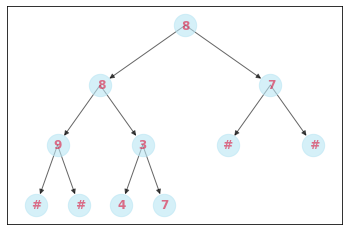

In [1]:
import warnings
import matplotlib.pyplot as plt
import networkx as nx
import pysnooper
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


warnings.filterwarnings('ignore')

%matplotlib inline


class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class completeBinaryTree():
    def __init__(self):
        self.root = None

    def append(self, item):
        newNode = TreeNode(item)
        if self.root is None:
            self.root = newNode
        else:
            queue = [self.root]  # 列表模拟队列
            while queue:
                curNode = queue.pop(0)
                if curNode.left is None:
                    curNode.left = newNode
                    return
                elif curNode.right is None:
                    curNode.right = newNode
                    return
                else:
                    queue.append(curNode.left)
                    queue.append(curNode.right)

    def appendLis(self, lis):
        ''' 批量添加节点 '''
        list(map(self.append, lis))

    def _create_graph(self, G, node, pos={}, x=0, y=0, layer=1, lastLKey='', lastRKey=''):
        uniqueK = self._uniqueKey(str(node.val), pos)
        pos[uniqueK] = (x, y)
        if node.left:
            G.add_edge(uniqueK, self._uniqueKey(str(node.left.val), pos))
            l_x, l_y = x - 1 / 2 ** layer, y - 1
            l_layer = layer + 1
            self._create_graph(G, node.left, x=l_x, y=l_y,
                               pos=pos, layer=l_layer)
        if node.right:
            G.add_edge(uniqueK, self._uniqueKey(str(node.right.val), pos))
            r_x, r_y = x + 1 / 2 ** layer, y - 1
            r_layer = layer + 1
            self._create_graph(G, node.right, x=r_x, y=r_y,
                               pos=pos, layer=r_layer)
        return (G, pos)

    def _uniqueKey(self, key, pos):
        add2left = True
        while key in pos:
            changed = True
            if add2left:
                key = ' ' + key
            else:
                key = key + ' '
            add2left = not add2left
        return key

    def draw(self, titleTex=''):
        ''' 以 node 为根可视化二叉树树 '''
        graph = nx.DiGraph()
        graph, pos = self._create_graph(graph, self.root)
        fig, ax = plt.subplots()  # 比例可以根据树的深度适当调节
        if titleTex:
            fig.suptitle(titleTex)
        nx.draw_networkx(
            graph, pos,
            ax=ax,
            node_size=500, node_color='#bae6f4', alpha=0.6,
            font_color='#DC143C', font_weight='bold'
        )


tree = completeBinaryTree()
tree.appendLis([8, 8, 7, 9, 3, '#', '#', '#', '#', 4, 7])
tree.draw()


In [42]:
str(8) + ' '

'8 '

In [31]:
add2left = True
add2left = not add2left

In [32]:
add2left

False

In [33]:
add2left = not add2left
add2left

True

## 2. 树的子结构
牛客网：[树的子结构](https://www.nowcoder.com/practice/6e196c44c7004d15b1610b9afca8bd88?tpId=13&tqId=11170&rp=1&ru=%2Fta%2Fcoding-interviews&qru=%2Fta%2Fcoding-interviews%2Fquestion-ranking&tPage=1): 输入两棵二叉树A，B，判断B是不是A的子结构。（ps：我们约定空树不是任意一个树的子结构）

思路：树 A 先广度优先遍历，直到某个节点与 B 头节点相同。此时 A 与 B 一同广度优先遍历。

In [2]:
class Solution:
    def HasSubtree(self, pRoot1, pRoot2):
        # write code here
        def equalVal(root1, root2):
            if not root2:
                return True
            if not root1:
                return False
            if root1.val == root2.val:
                if root2.left:
                    leftEqual = equalVal(root1.left, root2.left)
                else:
                    leftEqual = True
                if root2.right:
                    rightEqual = equalVal(root1.right, root2.right)
                else:
                    rightEqual = True
                return leftEqual and rightEqual
            return False

        # 检查输入
        if not (pRoot1 and pRoot2):
            return False

        queue = [pRoot1]
        while queue:
            node = queue.pop(0)
            if node.val == pRoot2.val:
                if equalVal(node, pRoot2):
                    return True
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        return False


## 1. 最小的k个数

牛客网：[最小的k个数](https://www.nowcoder.com/practice/6a296eb82cf844ca8539b57c23e6e9bf?tpId=13&tqId=11182&rp=1&ru=%2Fta%2Fcoding-interviews&qru=%2Fta%2Fcoding-interviews%2Fquestion-ranking&tPage=2): 输入n个整数，找出其中最小的K个数。例如输入4,5,1,6,2,7,3,8这8个数字，则最小的4个数字是1,2,3,4,。

思路：先构建最大堆，构建完成后的数与堆顶比较

In [38]:
# -*- coding:utf-8 -*-
class Solution:
    @classmethod
    def GetLeastNumbers_Solution(self, tinput, k):
        # write code here

        # 检查输入
        if not tinput or len(tinput) < k or k < 1:
            return []

        # 构建最大堆
        binHeapLis = [None, ]
        # heapSize = 0

        def insert2Heap(binHeapLis, key):
            binHeapLis.append(key)
            heapSize = len(binHeapLis) - 1

            current = heapSize
            while (current >> 1) != 0:
                parent = current >> 1
                if binHeapLis[current] > binHeapLis[parent]:
                    binHeapLis[current], binHeapLis[parent] = binHeapLis[parent], binHeapLis[current]
                else:
                    break
                current = parent
        #@pysnooper.snoop(watch=('binHeapLis', 'current', 'heapSize', 'maxChild'))
        def adjustHeap(binHeapLis):
            current = 1
            heapSize = len(binHeapLis) - 1
            maxChild = None

            while (current << 1) <= heapSize:
                leftChild = current << 1
                rightChild = leftChild + 1

                # 判断是否超界, 循环已经判断了左子节点，此处不需再判
                if rightChild > heapSize:
                    maxChild = leftChild
                else:
                    # 找出大的子节点
                    if binHeapLis[leftChild] < binHeapLis[rightChild]:
                        maxChild = rightChild
                    else:
                        maxChild = leftChild

                # 当前节点与大的子节点比较
                if binHeapLis[current] < binHeapLis[maxChild]:
                    binHeapLis[current], binHeapLis[maxChild] = binHeapLis[maxChild], binHeapLis[current]
                else:
                    break

                current = maxChild

        for index, num in enumerate(tinput):
            if index + 1 <= k:
                insert2Heap(binHeapLis, num)
            else:
                if num < binHeapLis[1]:
                    binHeapLis[1] = num
                    adjustHeap(binHeapLis)

        return sorted(binHeapLis[1:])


Solution.GetLeastNumbers_Solution([4, 5, 1, 6, 2, 7, 2, 8], 2)


[1, 2]